## Problem : To identify the NER given a sentence

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import keras

import plotly.offline as py
import plotly.graph_objects as go
py.init_notebook_mode(connected=True)

from utils import *

In [169]:
data

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data = pd.read_csv("data/ner_dataset.csv", encoding="latin1")

In [4]:
%load_ext autoreload
%autoreload 2

W0915 18:03:05.654987  9196 module_wrapper.py:136] From C:\Users\Sharon\Anaconda3\envs\nlpproj\lib\site-packages\tensorflow_core\python\util\module_wrapper.py:163: The name tf.estimator.inputs is deprecated. Please use tf.compat.v1.estimator.inputs instead.



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
Sentence #    47959 non-null object
Word          1048575 non-null object
POS           1048575 non-null object
Tag           1048575 non-null object
dtypes: object(4)
memory usage: 32.0+ MB


In [6]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [7]:
data['Sentence #'].notnull().sum()

47959

There are 47959 non-missing distinct Sentences. Use the forward fill method.

In [8]:
data = data.fillna(method="ffill")

## Get the distinct words, POS and Tag in the 'Word' Column

In [9]:
word, n_words = return_unique_len(data,'Word')
tags, n_tags = return_unique_len(data, 'Tag')
pos, n_pos = return_unique_len(data, 'POS')

print('There are {} distinct words'.format(n_words))
print('There are {} distinct tags'.format(n_tags))
print('There are {} distinct POS'.format(n_pos))

There are 35178 distinct words
There are 17 distinct tags
There are 42 distinct POS


In [10]:
#data_cat = pd.DataFrame({'Category':['Word','Tag','POS'],'Distinct_Count':[n_words,n_tags,n_pos]})
#fig = px.bar(data_cat, x='Category', y='Distinct_Count')
#py.iplot(fig)

In [11]:
# Turn sentences into list of tuples (word,tag,pos)
getter = GetSentence(data)

In [12]:
# Print the first 3 sentences
for i in range(3):
    sent = getter.get_next()
    print(str(i) +' '*5 + '='*100)
    print(sent[:10])    

0     ====================================================================================================
[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O')]
1     ====================================================================================================
[('Families', 'NNS', 'O'), ('of', 'IN', 'O'), ('soldiers', 'NNS', 'O'), ('killed', 'VBN', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'O'), ('conflict', 'NN', 'O'), ('joined', 'VBD', 'O'), ('the', 'DT', 'O'), ('protesters', 'NNS', 'O')]
2     ====================================================================================================
[('They', 'PRP', 'O'), ('marched', 'VBD', 'O'), ('from', 'IN', 'O'), ('the', 'DT', 'O'), ('Houses', 'NNS', 'O'), ('of', 'IN', 'O'), ('Parliament', 'NN', 'O'), ('to', 'TO', 'O'), ('a', 'DT', 'O'), ('rally', '

In [13]:
# Get the list of all sentences, where each sentence is a tuple
sentences = getter.sentences

## Padding or truncating sentences to length 50

This is to allow equal length inputs for Keras

In [26]:
# Get the dictionary of tags to their ids
#tag2idx = {t: i for i, t in enumerate(tags)}

tag2idx = np.load('data/my_dict.npy',allow_pickle=True).item()

#Sample
tag2idx["O"]

#read_dictionary = np.load('data/my_dict.npy',allow_pickle=True).item()
#read_dictionary["O"]

7

To use ELMo embeddings from Tensorflow Hub, we need strings as input to the pre-trained BiLM, so we convert each sentence tuple to a string.

In [27]:
X = pad_or_truncate(50,sentences)

In [30]:
%pprint

Pretty printing has been turned OFF


In [31]:
# Sample
X[0]

['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__']

In [32]:
# Represent
y = [[tag2idx[w[2]] for w in s] for s in sentences]

In [33]:
from keras.preprocessing.sequence import pad_sequences

# Pad each sequence to length 50, with trailing dictionary values of "O"s
y = pad_sequences(maxlen=50, sequences=y, padding="post", value=tag2idx["O"])

## Split data into train and test sets

In [34]:
assert len(X) == len(y)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2018)

In [36]:
# Define batch_size 
batch_size = 32

## Pre-Trained ELMo model from TensorFlow Hub

In [37]:
import tensorflow as tf
import tensorflow_hub as hub
from keras import backend as K

In [38]:
# Initialize tensorflow session

sess = tf.Session()
K.set_session(sess)

W0915 18:09:37.208824  9196 module_wrapper.py:136] From C:\Users\Sharon\Anaconda3\envs\nlpproj\lib\site-packages\tensorflow_core\python\util\module_wrapper.py:163: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [39]:
elmo_model = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

'trainable = True' sets the scalar coefficients in the ELMO task to be trainable weights, set to False if you do not want the weights to be trainable for the downstream supervised task. 'False' means we are just using average of sum of all 3 layers (Token embedding, 1st Layer, 2nd Layer), aka, weights = 1/3 and when we train using ELMO task, the ELMO embedding weights will not change, ie, constant.

We define a function that inputs a sequence of strings and outputs a sequence of ELMO embeddings of size 1024, that is the average of all layers in the SOTA ELMo model with respect to the input.

In [40]:
def ElmoEmbedding(x):
    return elmo_model(inputs={
                            "tokens": tf.squeeze(tf.cast(x, tf.string)),
                            "sequence_len": tf.constant(batch_size*[50])
                      },
                      signature="tokens",
                      as_dict=True)["elmo"]

In [41]:
from keras.models import Model, Input
from keras.layers.merge import add
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda

## Model Architecture

In [42]:
input_text = Input(shape=(50,), dtype=tf.string)
embedding = Lambda(ElmoEmbedding, output_shape=(50, 1024))(input_text)

x = Bidirectional(LSTM(units=512, return_sequences=True,
                       recurrent_dropout=0.2, dropout=0.2))(embedding)

x_rnn = Bidirectional(LSTM(units=512, return_sequences=True,
                           recurrent_dropout=0.2, dropout=0.2))(x)

x = add([x, x_rnn])  # residual connection to the first biLSTM

out = TimeDistributed(Dense(n_tags, activation="softmax"))(x)

W0915 18:09:48.157247  9196 deprecation.py:506] From C:\Users\Sharon\Anaconda3\envs\nlpproj\lib\site-packages\keras\backend\tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [43]:
model = Model(input_text, out)

In [44]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

W0915 18:09:55.060199  9196 module_wrapper.py:136] From C:\Users\Sharon\Anaconda3\envs\nlpproj\lib\site-packages\tensorflow_core\python\util\module_wrapper.py:163: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [46]:
# Load the weights after training
model.load_weights('my_model_weights.h5')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 50, 1024)     0           input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 50, 1024)     6295552     lambda_1[0][0]                   
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 50, 1024)     6295552     bidirectional_1[0][0]            
____________________________________________________________________________________________

In [47]:
# Make the no of training samples divisible by batch_size
X_train, X_val = X_train[:1213*batch_size], X_train[-135*batch_size:]
y_train, y_val = y_train[:1213*batch_size], y_train[-135*batch_size:]
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)
y_val = y_val.reshape(y_val.shape[0], y_val.shape[1], 1)

In [ ]:
# Better to do this on a GPU

In [ ]:
#history = model.fit(np.array(X_train), y_train, validation_data=(np.array(X_val), y_val),
                   # batch_size=batch_size, epochs=5, verbose=1)

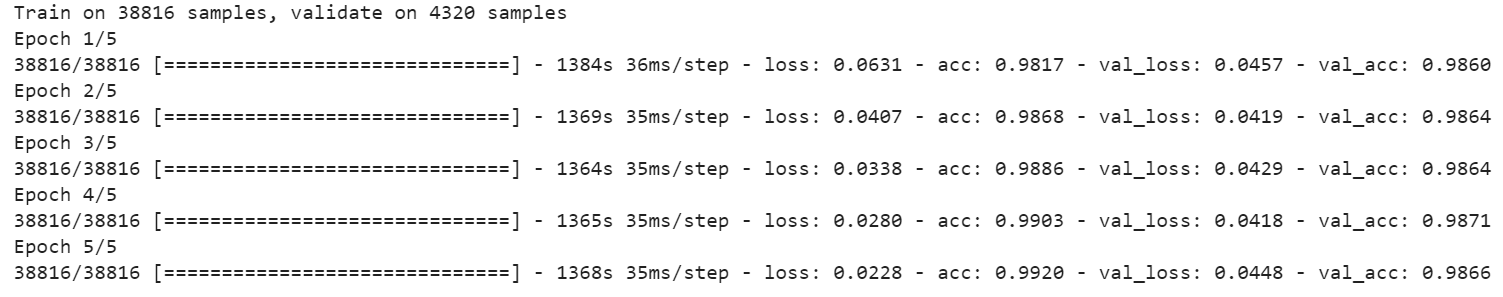

In [60]:
# Read the history csv
df_history = pd.read_csv('data/elmoNERhistory.csv')


# Performance of the model training

In [63]:
df_history

,Unnamed: 0,val_loss,val_acc,loss,acc
0,0,0.045688,0.985972,0.063070,0.981747
1,1,0.041940,0.986449,0.040733,0.986841
2,2,0.042940,0.986444,0.033804,0.988608
3,3,0.041752,0.987148,0.028049,0.990284
4,4,0.044756,0.986648,0.022834,0.991986


In [69]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_history["Unnamed: 0"], y=df_history["acc"],
                    mode='lines',
                    name='Train'))

fig.add_trace(go.Scatter(x=df_history["Unnamed: 0"], y=df_history["val_acc"],
                    mode='lines',
                    name='Val'))

fig.update_layout(title='Accuracy of Training / Testing',
                   xaxis_title='Epoch',
                   yaxis_title='Accuracy')
fig.show()

In [70]:
i = 100
p = model.predict(np.array(X_test[i:i+batch_size]))[0]  # 0 to take the prediction if itself
p = np.argmax(p, axis=-1)
print("{:15} {:5}: ({})".format("Word", "Pred", "True"))
print("="*30)
for w, true, pred in zip(X_test[i], y_test[i], p):
    if w != "__PAD__":
        print("{:15}:{:5} ({})".format(w, tags[pred], tags[true]))

Word            Pred : (True)
Forecasters    :B-eve (B-eve)
posted         :B-eve (B-eve)
a              :B-eve (B-eve)
tropical       :B-eve (B-eve)
storm          :B-eve (B-eve)
watch          :B-eve (B-eve)
for            :B-eve (B-eve)
parts          :B-eve (B-eve)
of             :B-eve (B-eve)
the            :B-eve (B-eve)
Florida        :O     (O)
Keys           :B-tim (B-tim)
,              :B-eve (B-eve)
a              :B-eve (B-eve)
chain          :B-eve (B-eve)
of             :B-eve (B-eve)
islands        :B-eve (B-eve)
off            :B-eve (B-eve)
southern       :O     (O)
Florida        :O     (B-tim)
.              :B-eve (B-eve)


In [166]:
def test_sample_sentence(SENT):
    50 - len(SENT.split())
    ['__PAD__' for i in range(50 - len(SENT.split()))]
    final = SENT.split() + ['__PAD__' for i in range(50 - len(SENT.split()))]
    
    X_testing = [['__PAD__' for j in range(50)] if i>0 else final for i in range(32)]
    
    prob = model.predict(np.array(X_testing))[0]
    prob = np.argmax(prob, axis=-1)
    
    for w, pred in zip(X_testing[0], prob):
        if w != "__PAD__":
            print("{:15}:({})".format(w, tags[pred]))

In [180]:
test_sample_sentence(' earthquake has approached killing lots of people .')

earthquake     :(B-eve)
has            :(B-eve)
approached     :(B-eve)
killing        :(B-eve)
lots           :(B-eve)
of             :(B-eve)
people         :(B-eve)
.              :(B-eve)


In [173]:
X_test[0]

['They', 'say', 'the', 'documents', 'were', 'found', 'in', 'the', 'computer', 'of', 'FARC', 'leader', 'Raul', 'Reyes', 'during', 'a', 'cross-border', 'raid', 'in', 'Ecuador', 'last', 'month', '.', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__', '__PAD__']